### Load data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("/home/hoangbaoan1901/Documents/information-system_UET/sem5/prdan/Homeworks/week-3-btl/datasets/jrfm-2156907.csv")

In [2]:
data['Date'] = pd.to_datetime(data['Date'])

#### Split train, test period

In [3]:
# Split data into 2 periods
start_day_p1 = pd.Timestamp(2015, 8, 7)
test_day_p1 = pd.Timestamp(2018, 4, 1)
end_day_p1 = pd.Timestamp(2018, 9, 30)

period1 = data[(data["Date"] >= start_day_p1) & (data["Date"] <= end_day_p1) ].reset_index(drop = True)
train_dataset_p1 = period1[period1["Date"] < test_day_p1].reset_index(drop = True)
test_dataset_p1 = period1[period1["Date"] >= test_day_p1].reset_index(drop = True)


start_day_p2 = pd.Timestamp(2018, 10, 1)
test_day_p2 = pd.Timestamp(2021, 10, 1)
end_day_p2 = pd.Timestamp(2022, 4, 1)

period2 = data[(data["Date"] >= start_day_p2) & (data["Date"] <= end_day_p2) ].reset_index(drop = True)
train_dataset_p2 = period2[period2["Date"] < test_day_p2].reset_index(drop = True)
test_dataset_p2 = period2[period2["Date"] >= test_day_p2].reset_index(drop = True)

train_dataset_p1 = train_dataset_p1.drop("Date", axis=1)
test_dataset_p1 = test_dataset_p1.drop("Date", axis=1)
train_dataset_p2 = train_dataset_p2.drop("Date", axis=1)
test_dataset_p2 = test_dataset_p2.drop("Date", axis=1)


print(period1.shape, period2.shape)

(1151, 48) (1279, 48)


### List Evaluation metrics

In [4]:
# Metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

def directional_accuracy(y_true, y_pred):
	y_test_da = np.array(y_true)
	y_pred_0 = y_pred[1:] - y_test_da[:-1]
	y_test_0 = y_true[1:] - y_test_da[:-1]
	DA = (y_pred_0<0) == (y_test_0<0)
	return np.mean(DA)*100

### Function to create X and y

In [5]:
# Function to create X and y
def create_train_test(train_dataset, test_dataset):
	X_train = train_dataset[:-1]
	Y_train = train_dataset["BTC_Close"][1:]
	X_test = test_dataset[:-1]
	Y_test = test_dataset["BTC_Close"][1:]
	return X_train, Y_train, X_test, Y_test

X_train_p1, Y_train_p1, X_test_p1, Y_test_p1 = create_train_test(train_dataset_p1, test_dataset_p1)
X_train_p2, Y_train_p2, X_test_p2, Y_test_p2 = create_train_test(train_dataset_p2, test_dataset_p2)

### Create model

#### Create ParamGrid

In [6]:
from sklearn.model_selection import ParameterGrid

params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 6, 9, 12]
}

param_grid = list(ParameterGrid(params))
print(len(param_grid))
print(param_grid[0])

540
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


In [7]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, n_estimators=500, objective='reg:squarederror', silent=True)

In [8]:
import gc
final_model = None
best_score = 1000000000

for param in param_grid:
    xgb.set_params(**param)
    xgb.fit(X_train_p1, Y_train_p1)
    Y_pred = xgb.predict(X_test_p1)
    score = root_mean_squared_error(Y_test_p1, Y_pred)
    if score < best_score:
        best_score = score
        final_model = xgb
        best_param = param
    gc.collect()
    print(param, score)

/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 319.5256442610779


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 313.8593932393272


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 348.7794612819211


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 323.8813321290451


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 318.467231321274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 327.2239096721736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 323.3846792639092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.15796727652764


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 321.41252391738806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 351.948375647512


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 329.4014002550636


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 346.0205913279092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 315.6358359207175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 319.44909785815634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 348.19150049036887


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 304.41908042557634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 302.6905356429645


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 301.2179756460712


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 366.10612144592966


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 354.27563908019863


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 353.9279692661829


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 308.36938378871093


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 321.9880599394946


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 347.9235515790047


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 301.6781497187238


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 296.16966409435804


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 295.69761250730994


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 363.81509829136814


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 351.4281750649847


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 355.1785611738268


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 308.7169077959964


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 319.3540624343908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 348.30782397403453


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 303.33942442478246


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 295.61767165386414


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 299.1248005862868


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 319.5256442610779


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 313.8593932393272


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 348.7794612819211


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 323.8813321290451


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 318.467231321274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 327.2239096721736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 323.3846792639092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.15796727652764


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 321.41252391738806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 351.94810383124207


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 333.21803897251874


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 345.31262209772285


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 315.6358359207175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 319.44909785815634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 357.1638643267058


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 304.41908042557634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 302.6905356429645


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 301.2179756460712


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:28:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 365.81499760985713


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 354.7314338808845


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 353.9029951593488


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 308.36938378871093


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 322.9958868476565


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 345.7268310932285


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 301.6781497187238


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 296.16966409435804


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 295.69761250730994


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 364.55803661312115


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 351.3692241393969


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:29:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 355.11014219535866


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 308.7169077959964


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 318.811169633684


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 348.7636324025297


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 303.33942442478246


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 295.61767165386414


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 299.1248005862868


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 319.5256442610779


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 313.8593932393272


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 348.7794612819211


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 323.8813321290451


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 318.467231321274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 327.2239096721736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 323.3846792639092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.15796727652764


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 321.41252391738806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:30:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 351.9482105408151


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 333.2180435091276


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 345.55178233868156


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 315.6358359207175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 319.44909785815634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 357.1638643267058


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 304.41908042557634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 302.6905356429645


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 301.2179756460712


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 371.655893656568


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 353.3906069205928


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 353.5213662909402


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 308.36938378871093


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 322.9958868476565


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:31:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 345.7268310932285


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 301.6781497187238


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:32:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 296.16966409435804


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:32:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 295.6439952036876


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 369.47194707635146


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 343.04703406649077


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 355.0451240048421


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 308.7169077959964


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 320.82552758792167


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 348.7636324025297


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 303.33942442478246


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 295.61767165386414


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 299.1248005862868


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 319.5256442610779


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:33:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 313.8593932393272


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 348.7794612819211


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 323.8813321290451


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 318.467231321274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 327.2239096721736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 323.3846792639092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.15796727652764


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 321.41252391738806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 351.9482105408151


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 332.58538051263565


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 345.6951808929514


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 315.6358359207175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 319.44909785815634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 357.1638643267058


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 304.41908042557634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 302.6905356429645


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 301.2179756460712


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 367.4247918488997


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:34:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 354.06617665213133


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 354.01295661310144


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 308.36938378871093


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 321.9858262617483


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 345.7268310932285


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 301.6781497187238


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 296.16966409435804


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 295.6439952036876


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 364.50567249057536


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 351.1066707373115


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 358.7571595945892


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 308.71744900372386


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 320.82567443151186


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 349.87942840968907


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 303.33942442478246


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:36:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 295.61767165386414


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 299.1248005862868


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 319.5256442610779


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 313.8593932393272


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 348.7794612819211


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 323.8813321290451


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 318.467231321274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 327.2239096721736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 323.3846792639092


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.15796727652764


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 321.41252391738806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 352.14377133438745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:37:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 332.45910524041466


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 345.68609247679916


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 315.6358359207175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 319.44909785815634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 357.1638643267058


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 304.41908042557634


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 302.6905356429645


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 301.2179756460712


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 366.68599386886683


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 351.74523626123323


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 353.48433948268166


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 308.36938378871093


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 323.15400601828566


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 346.98897119254866


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 301.6781497187238


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 296.16966409435804


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 296.66063985396175


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 363.46626238130085


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 350.6552743242011


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 357.2103133613906


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 309.82632026476875


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.33167715585915


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 348.656016632608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 303.33942442478246


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 295.617692211648


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:39:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 300.05990854508843


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 327.0440861106474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 312.93239605945587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 345.95616469969787


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 318.0727735704132


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 314.81666236927606


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 331.20879394882905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 300.8746444765059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 313.38307052044905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 342.5575004039582


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 365.012448691075


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 391.68785265904137


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 359.8504601646288


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 319.2910427079625


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:40:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 325.828867772587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 382.43481412047987


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 305.235366837224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 292.9707661191388


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 310.90331583747036


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 386.77205728516276


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 385.21424093480357


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 379.17149112553034


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 326.1517854522652


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 326.9686379685579


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 357.96442353153685


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 308.24658630551977


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 294.84942588321735


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 305.15840887510893


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 386.8947013398896


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 391.70259471110217


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 377.94614377410676


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 323.96080244324673


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.0017681433059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 370.7173188200147


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 307.8748768390534


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 298.11088439426237


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 309.2655293398735


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 327.0440861106474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 312.93239605945587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 345.95616469969787


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 318.0727735704132


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 314.81666236927606


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 331.20879394882905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 300.8746444765059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 313.38307052044905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 342.5575004039582


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 365.012448691075


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 391.9674210225226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 360.1252496308157


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 319.2910427079625


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 325.828867772587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 382.43481412047987


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 305.235366837224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 292.9707661191388


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 310.90319518269297


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 387.9650851564224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 383.68395433308365


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 381.2808998602968


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 326.1517854522652


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 325.49736848849403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 357.96442353153685


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 308.24658630551977


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:44:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 295.3718768859403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 305.15840887510893


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 384.81753558973736


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 391.5783533899137


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 378.5264392421116


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 323.96080244324673


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.0017681433059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 369.90011539358403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 307.8748768390534


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 298.11088439426237


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 309.2655293398735


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 327.0440861106474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 312.93239605945587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 345.95616469969787


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 318.0727735704132


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 314.81666236927606


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 331.20879394882905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 300.8746444765059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 313.38307052044905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 342.5575004039582


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 365.012448691075


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 393.9318301362928


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 360.438234711353


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 319.2910427079625


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 325.828867772587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 382.43481412047987


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 305.235366837224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 292.9707661191388


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 310.90319518269297


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:46:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 390.13640897145604


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 387.5119622198777


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 382.2241015931293


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 326.1517854522652


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 324.52433712076316


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 357.96442353153685


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 308.24658630551977


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 295.3718768859403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 304.8945410705577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 387.6090276195958


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:47:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 390.27553145587086


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 377.11018787809644


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 323.96080244324673


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.0017681433059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 369.1989380805447


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 307.8748768390534


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 298.11088439426237


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:48:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 308.3992427527931


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 327.0440861106474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 312.93239605945587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 345.95616469969787


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 318.0727735704132


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 314.81666236927606


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 331.20879394882905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 300.8746444765059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 313.38307052044905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 342.5575004039582


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 365.012448691075


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 393.93111864454875


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:49:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 360.44732079951115


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 319.2910427079625


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 325.828867772587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 382.43481412047987


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 305.235366837224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 292.9707661191388


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 310.90319518269297


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 395.4547843880729


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 386.3562317087907


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 383.46718974509616


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 326.1517854522652


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 324.4091206424236


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 367.1994840876241


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 308.24658630551977


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 295.3718768859403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 304.8945410705577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 391.84140598822535


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 390.6886415010184


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 377.3851606328757


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 323.96080244324673


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.4702816346603


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 367.8138909064806


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 307.8748768390534


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 296.3050862400334


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 309.26551924713283


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 327.0440861106474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 312.93239605945587


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 345.95616469969787


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 318.0727735704132


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 314.81666236927606


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 331.20879394882905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 300.8746444765059


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 313.38307052044905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 342.5575004039582


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 370.65865399903737


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 391.8768185746247


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:53:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 358.64851210913935


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 319.2910427079625


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 325.82843869541256


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 382.43481412047987


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 305.235366837224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 293.05176167845923


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 309.71415129669225


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 391.97799799472205


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:55:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 384.9200354224571


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:56:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 375.68264557091095


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 326.1517854522652


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:56:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 328.3850675161227


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 364.1790358766955


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 308.24658630551977


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:57:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 295.3718768859403


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 304.8945410705577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:57:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 388.122281329864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 392.2508713379065


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 378.5467062038681


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 329.3483765830088


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 326.7690457477657


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 366.3300570545185


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 307.8748768390534


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 296.3050862400334


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 305.49876226591255


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 322.6612924111068


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 316.49190254394733


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 335.19173998548376


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 321.4371952023864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 326.0986454623908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 351.026779469608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 311.18997635901417


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.8537386032901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 358.4023314286429


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 367.6081917882224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 397.02764047828106


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 364.63861194560474


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 334.3390107332049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 348.2158438320405


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 390.6953629669363


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 321.51223492009905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 303.76789745074745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 316.16046062750917


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 367.69899157196727


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:59:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 400.5515440744071


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 376.7434093330739


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 329.8663327048783


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 353.5267190941332


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 386.8463539211901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 321.1946805603617


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 301.231676879226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 317.00115769282826


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 380.05644787514296


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 404.4714187352485


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:00:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 390.64385663181076


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 333.2279517172138


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 350.28966027454555


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 387.1496772508612


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 320.62661579630577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 299.8949364515513


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 319.013929914709


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 322.6612924111068


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 316.49190254394733


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 335.19173998548376


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 321.4371952023864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 326.0986454623908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 351.026779469608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 311.18997635901417


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.8537386032901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 358.4023314286429


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 367.6081917882224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 397.02793273914864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 364.6973815415766


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 334.3390107332049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 348.2158438320405


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 390.6953629669363


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 321.51223492009905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 303.76789745074745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 316.16046062750917


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 363.1587965323552


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 399.45782230611894


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 375.0741262219873


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 329.8663327048783


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 351.79206651736274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 386.8463539211901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 321.1946805603617


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 301.231676879226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 316.1192470452063


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 378.7455674312689


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 406.9650567487198


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:05:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 391.55299603389597


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:05:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 333.2279517172138


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 350.4557760338979


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:05:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 387.1499074922282


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 320.62661579630577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 299.8949364515513


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 319.013929914709


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 322.6612924111068


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 316.49190254394733


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 335.19173998548376


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 321.4371952023864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 326.0986454623908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:06:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 351.026779469608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 311.18997635901417


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.8537386032901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 358.4023314286429


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 367.6081917882224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 397.02797954069933


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 359.7403802353187


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 334.3390107332049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 348.2158438320405


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 390.6953629669363


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 321.51223492009905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 303.76789745074745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 316.16046062750917


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 367.01983841007967


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 402.7965386979431


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 374.14972156180943


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 329.86611384990306


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 351.79206651736274


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 386.8463539211901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 321.1946805603617


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 301.231676879226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 316.1192470452063


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 380.7613479463695


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 402.0461885003941


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 391.40735013260223


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 333.2279517172138


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 348.6704942966369


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 386.36281704398056


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 320.62661579630577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 299.8949364515513


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 319.013929914709


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 322.6612924111068


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 316.49190254394733


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 335.19173998548376


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 321.4371952023864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 326.0986454623908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 351.026779469608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 311.18997635901417


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.8537386032901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 358.4023314286429


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 367.6081917882224


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 397.60213302743523


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 359.49968036446387


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 334.3390107332049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 348.2158438320405


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 390.6953629669363


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 321.51223492009905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 303.76789745074745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 316.16046062750917


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 365.2180774217087


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 399.2646029164898


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 381.46507098448615


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 329.86611384990306


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 351.2459536287841


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 386.8463539211901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 321.1946805603617


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 301.231676879226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 316.1192470452063


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 382.2120984618944


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 404.62412980501176


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 391.71440887786554


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 335.54813413022384


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 349.2687603444049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 387.354529013622


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 320.62661579630577


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 298.8794692341061


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 319.013929914709


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6} 322.6612924111068


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8} 316.49190254394733


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0} 335.19173998548376


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6} 321.4371952023864


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8} 326.0986454623908


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0} 351.026779469608


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6} 311.18997635901417


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8} 315.8537386032901


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0} 358.4023314286429


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6} 367.60837770752516


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} 397.5982235175849


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1.0} 360.54910318827626


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6} 334.3390107332049


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8} 348.2158438320405


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0} 390.6953629669363


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.6} 321.51223492009905


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 303.76789745074745


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 1.0} 316.16046062750917


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6} 366.9882515128504


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8} 401.78601535784406


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 1.0} 378.6596779906078


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:13:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6} 329.86611384990306


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8} 348.9612539387742


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 1.0} 390.1086618621264


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.6} 321.1946805603617


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8} 301.231676879226


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 1.0} 316.1192470452063


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.6} 381.6355416210014


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8} 408.1124607205404


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0} 384.6885797482562


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.6} 335.54813413022384


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 0.8} 351.1140587454535


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:15:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 5, 'subsample': 1.0} 378.51599177773545


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:15:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.6} 320.6266640189627


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 0.8} 299.9905749798131


/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:15:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 12, 'min_child_weight': 10, 'subsample': 1.0} 320.1691891365656


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8} 292.9707661191388
R2 score:  0.8920103581275615
directional_accuracy:  46.96132596685083


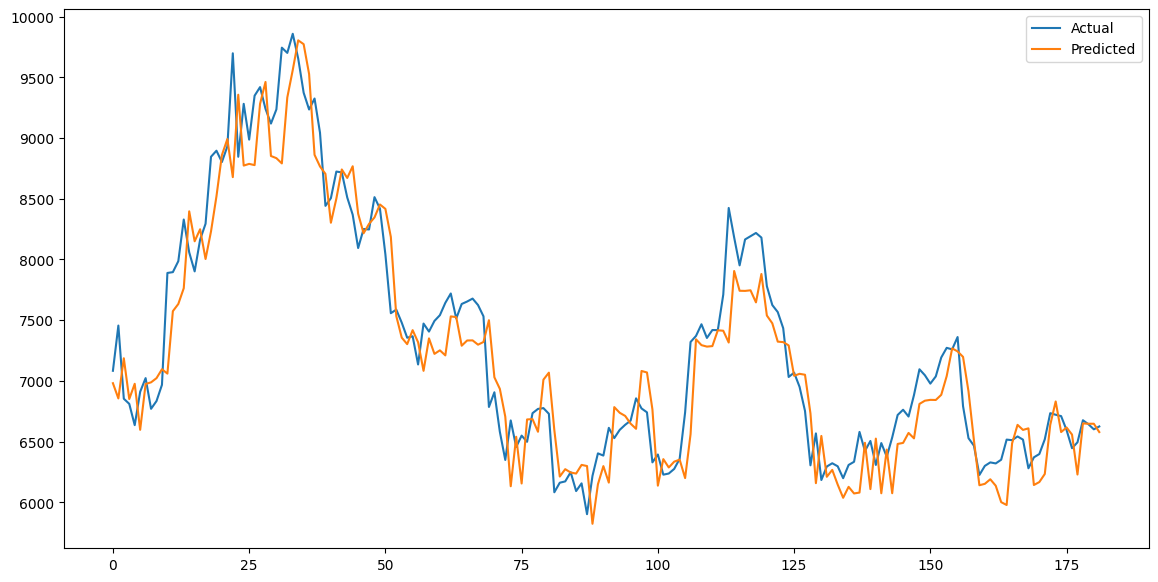

In [11]:
print(best_param, best_score)
# plot prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))

print("R2 score: ", r2_score(Y_test_p1, Y_pred))
print("directional_accuracy: ", directional_accuracy(Y_test_p1, Y_pred))

Y_pred = final_model.predict(X_test_p1)
plt.plot(Y_test_p1.values, label="Actual")
plt.plot(Y_pred, label="Predicted")
plt.legend()


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1400x700 with 0 Axes>

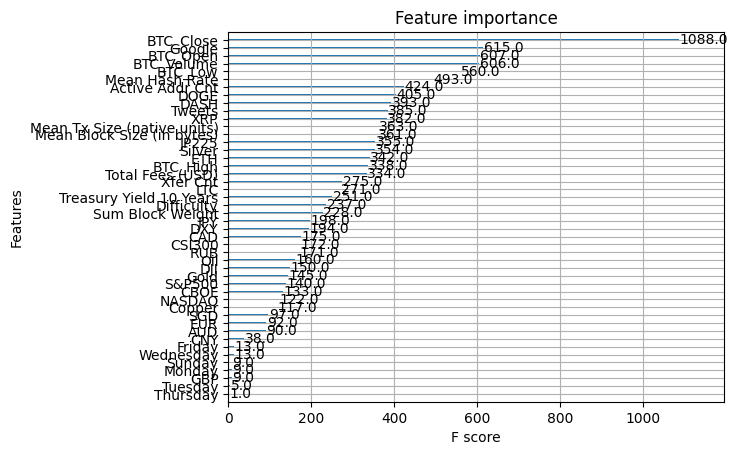

In [ ]:
# plot feature importance
from xgboost import plot_importance
plot_importance(final_model)

In [14]:
import pickle
import os
file_name = "/home/hoangbaoan1901/Documents/information-system_UET/sem5/prdan/Homeworks/week-3-btl/implementations/models/xgboost_p1.pkl"
if not os.path.exists(file_name):
    os.makedirs(os.path.dirname(file_name), exist_ok=True)
pickle.dump(final_model, open(file_name, "wb"))